### Plot Per-ligand domain statistics in boxplots

In [1]:
library(ggplot2)
library(reshape2)
library(ggpubr)
library(dplyr)

Loading required package: magrittr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data_path <- "/home/anat/Research/ExAC/10.Prediction/pred_AUC_AUPRC/mediode_NegLigand_NoFilter/NoDown/08.06.18_5f_comb_dna0.5_rna0.25_ion0.75/"
ligands_list <- c("rna",  "dna", "peptide", "ion", "sm")
classifiers_num <- 7
folds_num <- "5"

In [3]:
domain_auc_data <- list()
domain_auprc_data <- list()
domain_auprc_ratio_data <- list()

#Read the tables
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]

    #AUCs (not mean)
    auc_filename <- paste0(ligand, "_", folds_num, "w_d_auc.csv")
    domain_auc_data[[i]] <- read.csv(paste0(data_path, auc_filename), header = TRUE, sep = '\t', row.names = 1)
    #AUPRCs (not mean)
    auprc_filename <- paste0(ligand, "_", folds_num, "w_d_auprc.csv")
    domain_auprc_data[[i]] <- read.csv(paste0(data_path, auprc_filename), header = TRUE, sep = '\t', row.names = 1)
    #AUPRC ratios (not mean)
    auprc_ratio_filename <- paste0(ligand, "_", folds_num, "w_d_auprc_ratio.csv")
    domain_auprc_ratio_data[[i]] <- read.csv(paste0(data_path, auprc_ratio_filename), header = TRUE, sep = '\t', row.names = 1)
}

In [4]:
#Combining the (not mean) metrices and plotting them for one classifier
classifier <- "XGB"
ligands_col <- c()
auc_col <-c()
auprc_col <- c()
auprc_ratio_col <- c()
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    auc_col <- c(auc_col, as.numeric(domain_auc_data[[i]][[classifier]]))
    auprc_col <- c(auprc_col, as.numeric(domain_auprc_data[[i]][[classifier]]))
    auprc_ratio_col <- c(auprc_ratio_col, domain_auprc_ratio_data[[i]][[classifier]])
    ligands_col <- c(ligands_col, rep(ligand, length(domain_auc_data[[i]][[classifier]])))
}

In [5]:
#AUC df
auc_plot_df <- as.data.frame(cbind(auc_col, ligands_col))
colnames(auc_plot_df) <- c("AUC", "ligand")
auc_plot_df$AUC <- as.numeric(as.character(auc_plot_df$AUC))
auc_plot_df$ligand<-factor(auc_plot_df$ligand, levels=ligands_list)
#AUPRC df
auprc_plot_df <- as.data.frame(cbind(auprc_col, ligands_col))
colnames(auprc_plot_df) <- c("AUPRC", "ligand")
auprc_plot_df$AUPRC <- as.numeric(as.character(auprc_plot_df$AUPRC))
auprc_plot_df$ligand<-factor(auprc_plot_df$ligand, levels=ligands_list)
#AUPRC ratio df
auprc_ratio_plot_df <- as.data.frame(cbind(auprc_ratio_col, ligands_col))
colnames(auprc_ratio_plot_df) <- c("AUPRC_ratio", "ligand")
auprc_ratio_plot_df$AUPRC_ratio <- as.numeric(as.character(auprc_ratio_plot_df$AUPRC_ratio))
auprc_ratio_plot_df$ligand<-factor(auprc_ratio_plot_df$ligand, levels=ligands_list)

In [6]:
#Functions/constants for plotting
df_summary <- auc_plot_df %>% 
    group_by(ligand) %>% 
    tally()
dodge <- position_dodge(width=0.4)
ligands_labels <- c("RNA", "DNA", "peptide", "ion", "small\nmolecules")
colors <- list("#e41a1c", "#377eb8", "#4daf4a")

file saved to plots/tuned_not_stacked_domains_boxplots.png


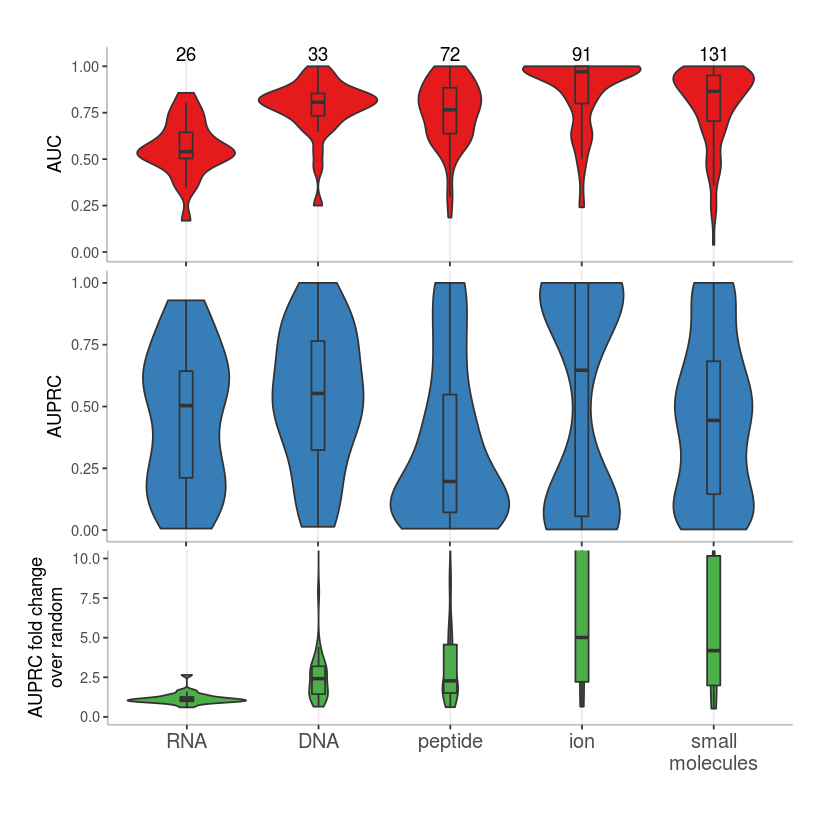

In [10]:
#Make 3 plots and combine them
auc_plot <- ggplot(auc_plot_df, aes(x=ligand, y=AUC, fill=colors[[1]])) +
    geom_violin(position=dodge) +
    geom_boxplot(width=.1, outlier.color = NA, position=dodge) +
    geom_text(data = df_summary, aes(ligand, Inf, label = n), vjust = 1) +
    theme_bw() +
    theme(legend.position="none") +
    theme(axis.text.x = element_blank(),
          plot.margin = unit(c(1,1,-0.20,1), "cm"),
          axis.line = element_line(colour = "grey", size=0.5),
          panel.border = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank()) +
    xlab("") +
    coord_cartesian(ylim=c(0,1.05)) +
    scale_fill_manual(values=colors[[1]])

auprc_plot <- ggplot(auprc_plot_df, aes(x=ligand, y=AUPRC, fill=colors[[2]])) +
    geom_violin(position=dodge) +
    geom_boxplot(width=.1, position=dodge) +
    theme_bw() +
    theme(legend.position="none") +
    theme(axis.text.x = element_blank(),
          plot.margin = unit(c(-0.20,1,-0.20,1), "cm"),
          axis.line = element_line(colour = "grey", size=0.5),
          panel.border = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank()) +
    xlab("") +
    scale_fill_manual(values=colors[[2]])

auprc_ratio_plot <- ggplot(auprc_ratio_plot_df, aes(x=ligand, y=AUPRC_ratio, fill=colors[[3]])) +
    geom_violin(position=dodge) +
    geom_boxplot(width=.1, outlier.color = NA, position=dodge) +
    scale_x_discrete(labels= ligands_labels) +
    theme_bw() +
    theme(legend.position="none",
          plot.margin = unit(c(-0.20,1,1,0.6), "cm"),
          axis.line = element_line(colour = "grey", size=0.5),
          axis.text.x = element_text(size=12),
          panel.border = element_blank(),
          panel.grid.major.y = element_blank(),
          panel.grid.minor.y = element_blank()) +
    xlab("") +
    ylab("AUPRC fold change\nover random") +
    #scale_y_continuous(limits=c(0,15)) +
    coord_cartesian(ylim=c(0,10)) +
    scale_fill_manual(values=colors[[3]])

plots_list <- list(auc_plot, auprc_plot, auprc_ratio_plot)
final_fig <- ggarrange(plotlist=plots_list, ncol = 1, nrow=3)
ggexport(final_fig, filename="plots/tuned_not_stacked_domains_boxplots.png", width = 800, height = 1000, res=100)
final_fig